<table style="width:100%">
  <tr>
    <th> <img src="logo_EPM_UNIOVI_CabeceroWEB.gif" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></th>
    <th><font color=brown>Procesamiento de imágenes de Sensores Aerotransportados y Satélite</font>
         </font></th> 
    <th><font color=green>Universidad de Oviedo.                       Ingeniería en Geomática</font>        sgcortes@uniovi.es</th>
  </tr>
</table>

## T12: Segmentación

### 12.3 Detección de bordes. (Edge detection)
La detección de bordes (edges), entendidos como discontinuidades bruscas en el nivel digital nos ayuda a reducir la cantidad de datos que es necesario almacenar para mantener el aspecto "estructural" de una imagen. Veamos algunas técnicas basadas en el gradiente Soble (primera derivada) y la Laplaciana (sergunda derivada) . Ambas técncias se apoyan en la convolución de un filtro sobre la imagen y especialmente el filtro de la Laplaciana es muy sensible al ruido de la imagen.

### 12.3.1 Filtros de Soble, Prewit, Roberts, Laplaciana
El detector de bnordes de Sobel es un método basado en el gradiente que emplea el cálculo aproimado de las dervadas de primer orden en las direcciones de las X y las Y, que calcula separadamente.

El operador emplea kernels (máscaras o templates) 3x3 que se convuelven con la imagen original para calcular las aproximaciones de la derivadas correspondientes a los cambios horizontales y verticales.Los kernels empleados para la extracción de bordes verticales y horizontales son respectivamente los siguientes:


$\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 
\end{bmatrix}$

$\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 
\end{bmatrix}$



Al contrario que el operador de sobel, el filtro de la Laplaciana emplea solamente un solo kernel con el que calcula las derivadas segundas de la imagen en una única convolución.El kernel de la Laplaciana tiene esta expresión:

$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

Si queremos considerar también las líneas diagonales podemos emplear este otro kernel:

$\begin{bmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

La función de OpenCV para el filtro de la Laplaciana es: **dst	=	cv.Laplacian(	src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]	)**

* src	Source image.
* dst	Destination image of the same size and the same number of channels as src .
* ddepth	Desired depth of the destination image.(emplear una profundidad de bits que sea capaz de almacenar valores negativos)
* ksize	Aperture size used to compute the second-derivative filters. See getDerivKernels for details. The size must be positive and odd.
* scale	Optional scale factor for the computed Laplacian values. By default, no scaling is applied. See getDerivKernels for details.
* delta	Optional delta value that is added to the results prior to storing them in dst .

**One Important Matter!**
If you use, output datatypes like cv2.CV_8U or np.uint8 there would a problem. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc.



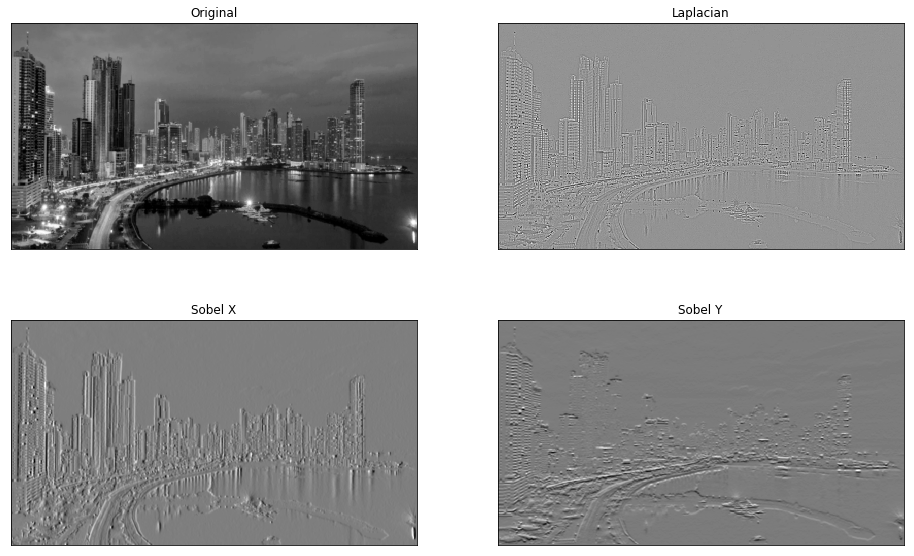

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('panama.png')

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y


plt.figure(figsize=(16,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()